<a href="https://colab.research.google.com/github/nahianabir/Research-Materials/blob/main/Explainable_AI_with_Grad_Cam_test_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up:

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=230f062687143ea41c7692638d357bc72627d6159482307ebe4f71d06a5cbb1b
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torchvision.transforms as transforms, torchvision, matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# the CIFAR10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))


trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=4,
                                          shuffle=True)

X_train = []
y_train = []
for data, target in trainset:
    X_train.append(np.array(data))
    y_train.append(target)

# Convert lists to NumPy arrays for train_test_split
X_train = np.array(X_train)
y_train = np.array(y_train)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

images, labels = next(iter(trainloader))



100%|██████████| 170M/170M [00:03<00:00, 43.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


# cnn

In [ ]:
# ================================================
# 1) Install/Import
# ================================================
!pip install grad-cam
!pip install --quiet torch torchvision pytorch-grad-cam
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

# Grad-CAM imports
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39648 sha256=d8a6fd5bfa364986d8e7b337f49ab9b86448edde02cce2d1bf0b2d391e476c2b
  Stored in directory: /root/.cache/pip/wheels/8b/0d/d2/b12bec1ccc028921fb98158042ade2d19dae73925dfc636954
Successfully built grad-cam
ERROR: Could not find a version that satisfies the requirement pytorch-grad-cam (from versions: none)
ERROR: No matching distribution found for pytorch-grad-cam


In [ ]:
# ================================================
# 2) Define a Simple CNN Model
# ================================================
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3)
        self.fc1   = nn.Linear(in_features=16 * 5 * 5, out_features=10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # shape: (N, 8, 26, 26)
        x = self.pool(x)               # shape: (N, 8, 13, 13)
        x = torch.relu(self.conv2(x))  # shape: (N, 16, 11, 11)
        x = self.pool(x)               # shape: (N, 16, 5, 5)
        x = x.view(-1, 16 * 5 * 5)     # flatten
        x = self.fc1(x)                # shape: (N, 10)
        return x

In [ ]:
# ================================================
# 3) Load MNIST
# ================================================
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.1307,), (0.3081,)) # Optional normalization
])

train_ds = torchvision.datasets.MNIST(root='./data', train=True,  download=True, transform=transform)
test_ds  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_ds,  batch_size=64, shuffle=False)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 575kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.52MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 11.3MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Using device: cuda


In [ ]:
# ================================================
# 4) Train the CNN (1 epoch for speed)
# ================================================
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

model.train()
for epoch in range(1):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1, Loss: 0.3424


In [ ]:
# ================================================
# 5) Grad-CAM on one test image
# ================================================
model.eval()

# Pick a single sample from the test set
test_iter = iter(test_loader)
images, labels = next(test_iter)  # 64 images
image = images[0].unsqueeze(0).to(device)  # shape (1,1,28,28)
label = labels[0].item()

# Forward pass for prediction
with torch.no_grad():
    logits = model(image)
    predicted_class = logits.argmax(dim=1).item()
print(f"True label: {label}, Predicted: {predicted_class}")

# -----------------------------------------------

True label: 7, Predicted: 7


In [ ]:
# Grad-CAM setup
# -----------------------------------------------
# We'll target the second conv layer for better feature localization
target_layer = model.conv2

# We'll target the second conv layer for better feature localization
target_layer = model.conv2

# Pass the target_layer as a list
cam = GradCAM(model=model, target_layers=[target_layer])  # Add target_layer here

# The "targets" is what class index you want to visualize
targets = [ClassifierOutputTarget(predicted_class)]

# Compute Grad-CAM
# No need to pass target_layers again here
grayscale_cam = cam(input_tensor=image, targets=targets)  # shape (batch, 28, 28) in 2D
# Grad-CAM returns an array for each image in the batch, so get index 0
cam_mask = grayscale_cam[0]

In [ ]:
# -----------------------------------------------
# Convert to a visualizable overlay
# -----------------------------------------------
# 1) Convert original image to NumPy in [0,1] range
img_np = image.squeeze().detach().cpu().numpy()  # shape (28,28)
img_min, img_max = img_np.min(), img_np.max()
img_normalized = (img_np - img_min) / (img_max - img_min)

## Test image

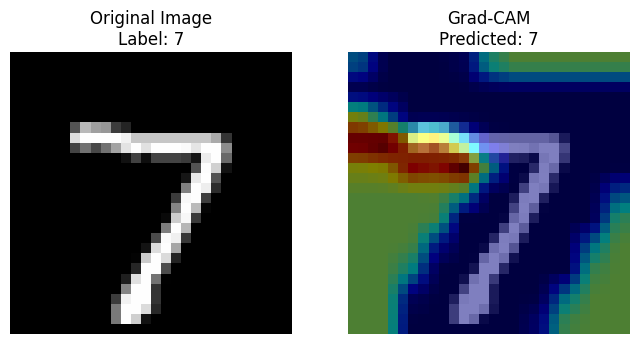

In [ ]:
# 2) Use show_cam_on_image to overlay the cam
#    show_cam_on_image expects RGB images in range [0,1], so stack grayscale into 3 channels
rgb_img = np.stack([img_normalized, img_normalized, img_normalized], axis=-1)
visualization = show_cam_on_image(rgb_img, cam_mask, use_rgb=True)

# Plot side-by-side: original & Grad-CAM
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].imshow(img_np, cmap='gray')
axs[0].set_title(f"Original Image\nLabel: {label}")
axs[0].axis('off')

axs[1].imshow(visualization)
axs[1].set_title(f"Grad-CAM\nPredicted: {predicted_class}")
axs[1].axis('off')

plt.show()

## Three images from different classes

In [ ]:
model.eval()

SimpleCNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=10, bias=True)
)

Image Index: 0, True label: 7, Predicted: 7


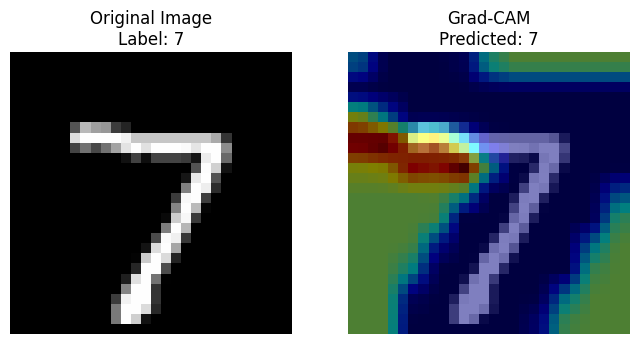

Image Index: 1, True label: 2, Predicted: 2


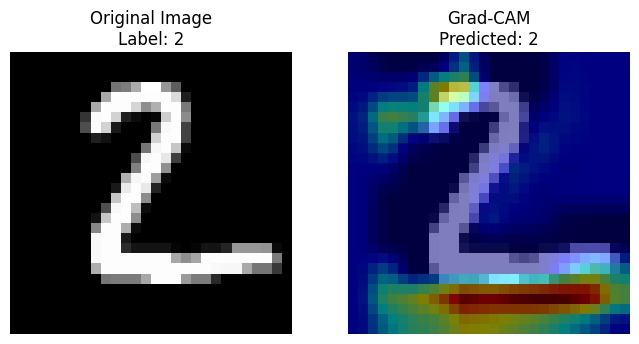

Image Index: 2, True label: 1, Predicted: 1


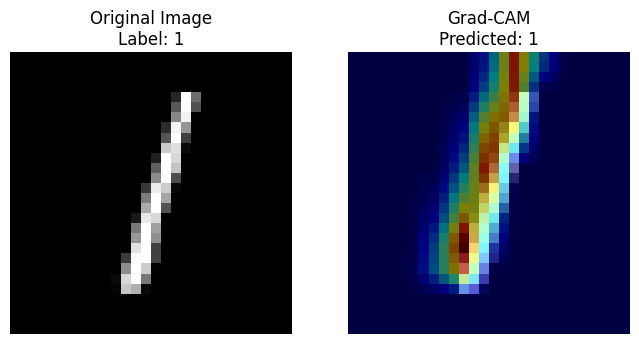

In [ ]:


# Select three images from different classes
num_images_to_visualize = 3
selected_images = []
selected_labels = []
image_indices = []

for i in range(len(test_loader.dataset)):
    image, label = test_loader.dataset[i]
    if label not in selected_labels and len(selected_labels) < num_images_to_visualize:
        selected_images.append(image)
        selected_labels.append(label)
        image_indices.append(i)

# Grad-CAM for each selected image
for i in range(num_images_to_visualize):
    image = selected_images[i].unsqueeze(0).to(device)
    label = selected_labels[i]

    with torch.no_grad():
        logits = model(image)
        predicted_class = logits.argmax(dim=1).item()

    print(f"Image Index: {image_indices[i]}, True label: {label}, Predicted: {predicted_class}")

    target_layer = model.conv2
    cam = GradCAM(model=model, target_layers=[target_layer])
    targets = [ClassifierOutputTarget(predicted_class)]
    grayscale_cam = cam(input_tensor=image, targets=targets)
    cam_mask = grayscale_cam[0]

    img_np = image.squeeze().detach().cpu().numpy()
    img_min, img_max = img_np.min(), img_np.max()
    img_normalized = (img_np - img_min) / (img_max - img_min)
    rgb_img = np.stack([img_normalized, img_normalized, img_normalized], axis=-1)
    visualization = show_cam_on_image(rgb_img, cam_mask, use_rgb=True)

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(img_np, cmap='gray')
    axs[0].set_title(f"Original Image\nLabel: {label}")
    axs[0].axis('off')

    axs[1].imshow(visualization)
    axs[1].set_title(f"Grad-CAM\nPredicted: {predicted_class}")
    axs[1].axis('off')

    plt.show()

### **Insight:**
**predictions are true. model is performing well**